<a href="https://colab.research.google.com/github/dipu-malitha/Python-Projects/blob/main/Confusion_Matrix_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Confusion Matrix**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
X, y = make_classification(n_samples=1000, n_features= 5, n_classes=2, random_state=1)

In [12]:
X

array([[-1.39087601,  0.62478042,  3.4809096 ,  2.3823372 ,  0.38622388],
       [-0.48529475,  0.30051483,  1.33915253,  0.84620081,  1.17745439],
       [-0.73504687,  0.13412273,  1.54350554,  1.22343943, -0.62879943],
       ...,
       [-0.82358043, -1.67277753, -1.02365026,  1.04002816, -0.11854175],
       [ 0.98789408,  2.10104553,  1.37063331, -1.23037436, -0.56362206],
       [ 0.63522093,  1.25870523,  0.74197203, -0.8078796 , -0.9128101 ]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

array([[-0.86414953, -1.86672332, -1.24252417,  1.07102081, -2.03216732],
       [-0.35865617, -1.07069735, -0.96259709,  0.3908226 ,  0.67452822],
       [ 2.08615917,  1.93930983, -0.87719836, -3.05135286,  1.30120189],
       ...,
       [ 0.61830949, -0.44173959, -1.79508309, -1.08881527,  0.97680326],
       [-0.32265395, -0.91310862, -0.79029591,  0.36068352, -0.31746617],
       [-0.05388574,  1.70369456,  2.67111946,  0.39701891,  2.08412285]])

In [15]:
from sklearn.tree import DecisionTreeClassifier
cif = DecisionTreeClassifier()
cif.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = cif.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[118,  28],
       [ 18, 136]])

<function matplotlib.pyplot.show(close=None, block=None)>

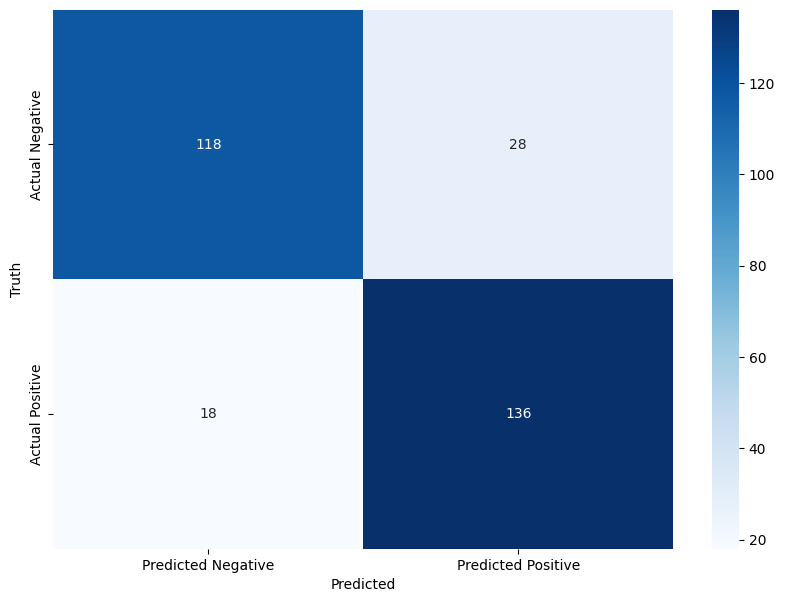

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       146
           1       0.83      0.88      0.86       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x700 with 0 Axes>

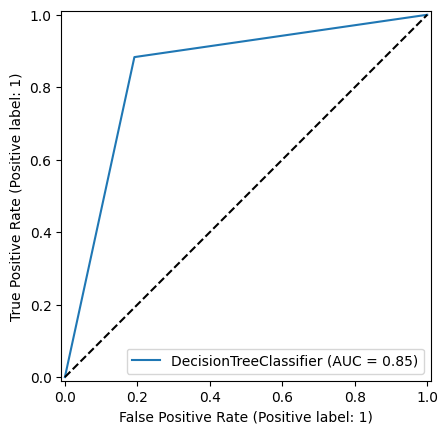

In [26]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,7))
RocCurveDisplay.from_estimator(cif, X_test, y_test)
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.show